In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from pathlib import Path

In [3]:
data_folder = Path('data/')
absolute_path_inf = data_folder / 'inflation.xlsx'
absolute_path_data = data_folder / 'tab3-zpl_2023.xlsx'

In [4]:
# загрузка данных с 2017
data1 = pd.read_excel(absolute_path_data, sheet_name=0)

In [5]:
# переименуем столбцы
data1.columns = ['types', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

In [6]:
# удалим ненужные строки
data1 = data1.drop([0,1,2,3,57,58,59])
# data

In [7]:
for i in data1.index:
    data1['types'][i] = data1['types'][i].lower()

C:\Users\gosha\AppData\Local\Temp\ipykernel_4980\3849369696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['types'][i] = data1['types'][i].lower()


In [8]:
# загрузка данных с 2000 года
data2 = pd.read_excel(absolute_path_data, sheet_name=1)
data2.columns = ['types'] + [str(i) for i in range(2000, 2017)]
data2 = data2.drop([0,1,37,38])
for i in data2.index:
    data2['types'][i] = data2['types'][i].lower()

C:\Users\gosha\AppData\Local\Temp\ipykernel_4980\4291382930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['types'][i] = data2['types'][i].lower()


In [9]:
# выбираю интересующие сферы
data_1 = data1.loc[[43,46,54]]

In [10]:
data_1['types'][46] = 'гостиницы и рестораны'

C:\Users\gosha\AppData\Local\Temp\ipykernel_4980\3636010407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['types'][46] = 'гостиницы и рестораны'


In [11]:
# устанавливаю индекс с 0
data_1.index = [0,1,2]

In [12]:
# выбираю интересующие меня сферы, устанавливаю индекс по порядку с 0
data_2 = data2.loc[[26,28,34]]
data_2.index = [0,1,2]


In [13]:
# соединяем данные за 2000-2016 года с данными с 2017 года
salaries = data_2.merge(data_1)
salaries.index = salaries['types'].values
salaries.drop('types', axis=1, inplace=True)
salaries = salaries.astype('float64')

In [14]:
salaries.T.head(24)

,строительство,гостиницы и рестораны,образование
2000,2639.8,1640.0,1240.2
2001,3859.3,2403.6,1833.0
2002,4806.9,3039.3,2927.3
2003,6176.7,3966.7,3386.6
2004,7304.7,4737.3,4203.4
2005,9042.8,6033.4,5429.7
2006,10869.2,7521.7,6983.3
2007,14333.4,9339.0,8778.3
2008,18574.0,11536.2,11316.8
2009,18122.2,12469.6,13293.6


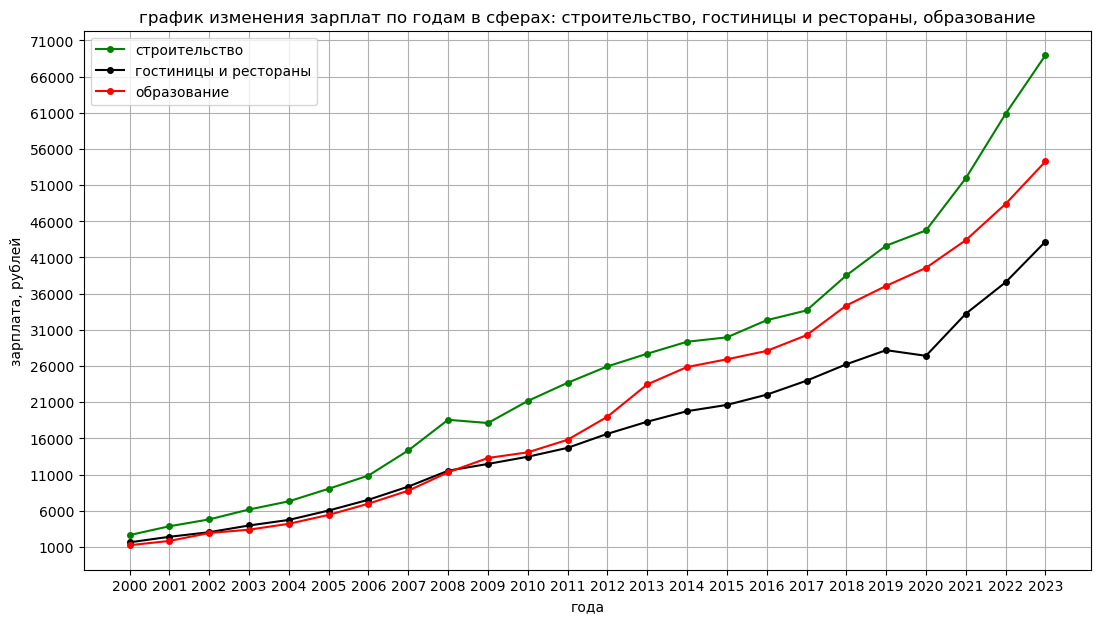

In [15]:
# строю графики изменения зарплат 
plt.figure(figsize=[13,7])
plt.yticks(np.arange(1000, 77000, step=5000))
plt.grid()
plt.plot(salaries.columns, salaries.iloc[0].values, color='green', marker='.', markersize=8)
plt.plot(salaries.columns, salaries.iloc[1].values, color='black', marker='.', markersize=8)
plt.plot(salaries.columns, salaries.iloc[2].values, color='red', marker='.', markersize=8)
plt.title('график изменения зарплат по годам в сферах: строительство, гостиницы и рестораны, образование')
plt.xlabel('года')
plt.ylabel('зарплата, рублей')
plt.legend(salaries.index)

Выводы: Выросли все рассмотреные экономические деятельности, сильнее всего выросла деятельность строительство, меньше всего гостиницы и рестораны. Хорошо показывает себя деятельность образование. Рост номинальных зарплат имеет положительный тренд.

In [16]:
# считываем данные об уровне инфляции по годам
inf = pd.read_excel(absolute_path_inf, header=None, index_col=0)
inf.index.name = None
inf.columns = ['inf']
print('Уровни инфляции по годам')
inf.T

Уровни инфляции по годам


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
inf,20.2,18.58,15.06,11.99,11.74,10.91,9.0,11.87,13.28,8.8,...,11.36,12.91,5.38,2.52,4.27,3.05,4.91,8.39,11.92,7.42


In [17]:
# средние зарплаты с учётом уровня инфляции
salaries_with_inflation = (salaries * (1 - inf['inf'].values/100)).round(2)
salaries_with_inflation.T

,строительство,гостиницы и рестораны,образование
2000,2106.56,1308.72,989.68
2001,3142.24,1957.01,1492.43
2002,4082.98,2581.58,2486.45
2003,5436.11,3491.09,2980.55
2004,6447.13,4181.14,3709.92
2005,8056.23,5375.16,4837.32
2006,9890.97,6844.75,6354.80
2007,12632.03,8230.46,7736.32
2008,16107.37,10004.19,9813.93
2009,16527.45,11372.28,12123.76


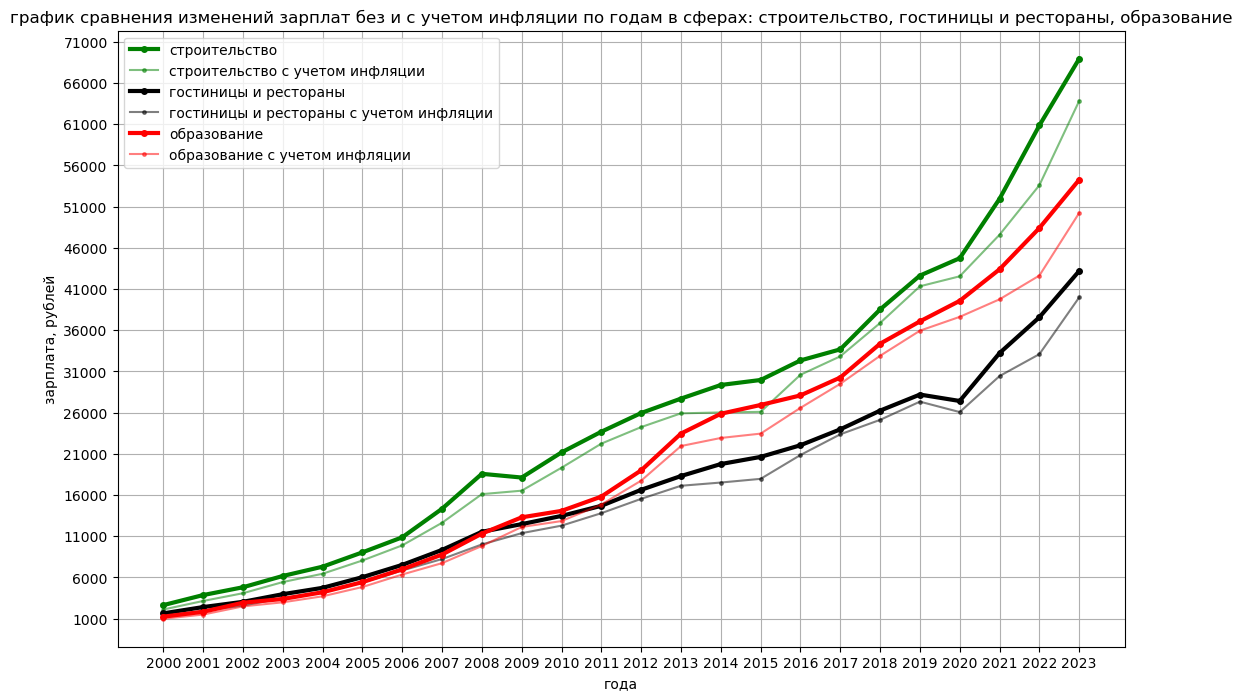

In [18]:
# строю графики изменения зарплат 
plt.figure(figsize=[13,8])
plt.yticks(np.arange(1000, 77000, step=5000))
plt.grid()
plt.plot(salaries.columns, salaries.iloc[0].values, color='green', marker='.', markersize=8, linewidth=3)
plt.plot(salaries_with_inflation.columns, salaries_with_inflation.iloc[0].values, color='green', marker='.', markersize=5, alpha=0.5)
plt.plot(salaries.columns, salaries.iloc[1].values, color='black', marker='.', markersize=8, linewidth=3)
plt.plot(salaries_with_inflation.columns, salaries_with_inflation.iloc[1].values, color='black', marker='.', markersize=5, alpha=0.5)
plt.plot(salaries.columns, salaries.iloc[2].values, color='red', marker='.', markersize=8, linewidth=3)
plt.plot(salaries_with_inflation.columns, salaries_with_inflation.iloc[2].values, color='red', marker='.', markersize=5, alpha=0.5)
plt.title('график сравнения изменений зарплат без и с учетом инфляции по годам в сферах: строительство, гостиницы и рестораны, образование')
plt.xlabel('года')
plt.ylabel('зарплата, рублей')
plt.legend(['строительство', 'строительство с учетом инфляции', "гостиницы и рестораны", "гостиницы и рестораны с учетом инфляции",
            "образование", "образование с учетом инфляции"])

In [19]:
# номинальный рост средних зарплат
salary_growth = salaries.diff(axis=1).fillna(0)
print('Номинальный рост зарплаты')
salary_growth.T

Номинальный рост зарплаты


,строительство,гостиницы и рестораны,образование
2000,0.0,0.0,0.0
2001,1219.5,763.6,592.8
2002,947.6,635.7,1094.3
2003,1369.8,927.4,459.3
2004,1128.0,770.6,816.8
2005,1738.1,1296.1,1226.3
2006,1826.4,1488.3,1553.6
2007,3464.2,1817.3,1795.0
2008,4240.6,2197.2,2538.5
2009,-451.8,933.4,1976.8


In [40]:
# на сколько выросли номинальные зарплаты в процентах по сравнению с предыдущим годом
sal_growth_percen = (salary_growth.shift(-1, axis=1) / salaries * 100).shift(axis=1).round(0).fillna(0)
sal_growth_percen.T

,строительство,гостиницы и рестораны,образование
2000,0.0,0.0,0.0
2001,46.0,47.0,48.0
2002,25.0,26.0,60.0
2003,28.0,31.0,16.0
2004,18.0,19.0,24.0
2005,24.0,27.0,29.0
2006,20.0,25.0,29.0
2007,32.0,24.0,26.0
2008,30.0,24.0,29.0
2009,-2.0,8.0,17.0


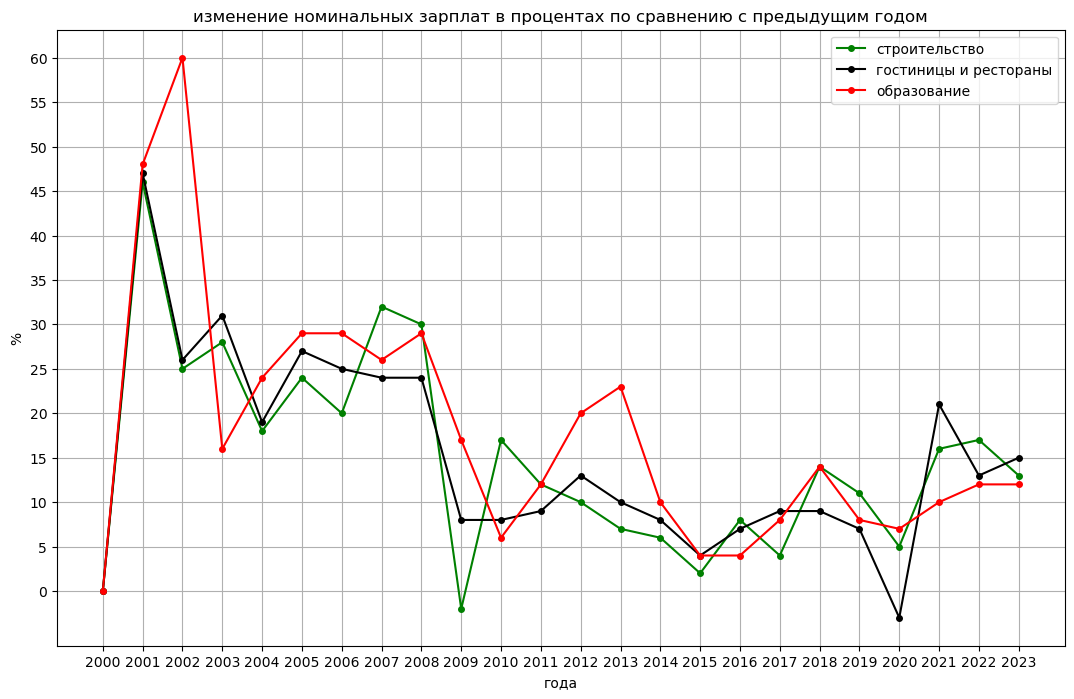

In [49]:
# график роста зарплат в процентах по сравнению с предыдущим годом
plt.figure(figsize=[13,8])
plt.yticks(np.arange(0, 70, step=5))
plt.grid()
plt.plot(sal_growth_percen.columns, sal_growth_percen.iloc[0].values, color='green', marker='.', markersize=8)
plt.plot(sal_growth_percen.columns, sal_growth_percen.iloc[1].values, color='black', marker='.', markersize=8)
plt.plot(sal_growth_percen.columns, sal_growth_percen.iloc[2].values, color='red', marker='.', markersize=8)
plt.title('изменение номинальных зарплат в процентах по сравнению с предыдущим годом')
plt.xlabel('года')
plt.ylabel('%')
plt.legend(['строительство','гостиницы и рестораны','образование'])

In [21]:
# насколько должна была быть выше зарплата с учетом инфляции
salar_inf = (salaries * (inf['inf'].values/100)).round(2)
salar_inf.T

,строительство,гостиницы и рестораны,образование
2000,533.24,331.28,250.52
2001,717.06,446.59,340.57
2002,723.92,457.72,440.85
2003,740.59,475.61,406.05
2004,857.57,556.16,493.48
2005,986.57,658.24,592.38
2006,978.23,676.95,628.50
2007,1701.37,1108.54,1041.98
2008,2466.63,1532.01,1502.87
2009,1594.75,1097.32,1169.84


In [22]:
# рост зарплат с поправкой на инфляцию(реальный рост зарплат)
salary_growth_with_inflation = salary_growth.sub(salar_inf.shift(axis=1), axis=1, fill_value=0)
print('Реальный рост зарплат с учётом инфляции')
salary_growth_with_inflation.T

Реальный рост зарплат с учётом инфляции


,строительство,гостиницы и рестораны,образование
2000,0.00,0.00,0.00
2001,686.26,432.32,342.28
2002,230.54,189.11,753.73
2003,645.88,469.68,18.45
2004,387.41,294.99,410.75
2005,880.53,739.94,732.82
2006,839.83,830.06,961.22
2007,2485.97,1140.35,1166.50
2008,2539.23,1088.66,1496.52
2009,-2918.43,-598.61,473.93


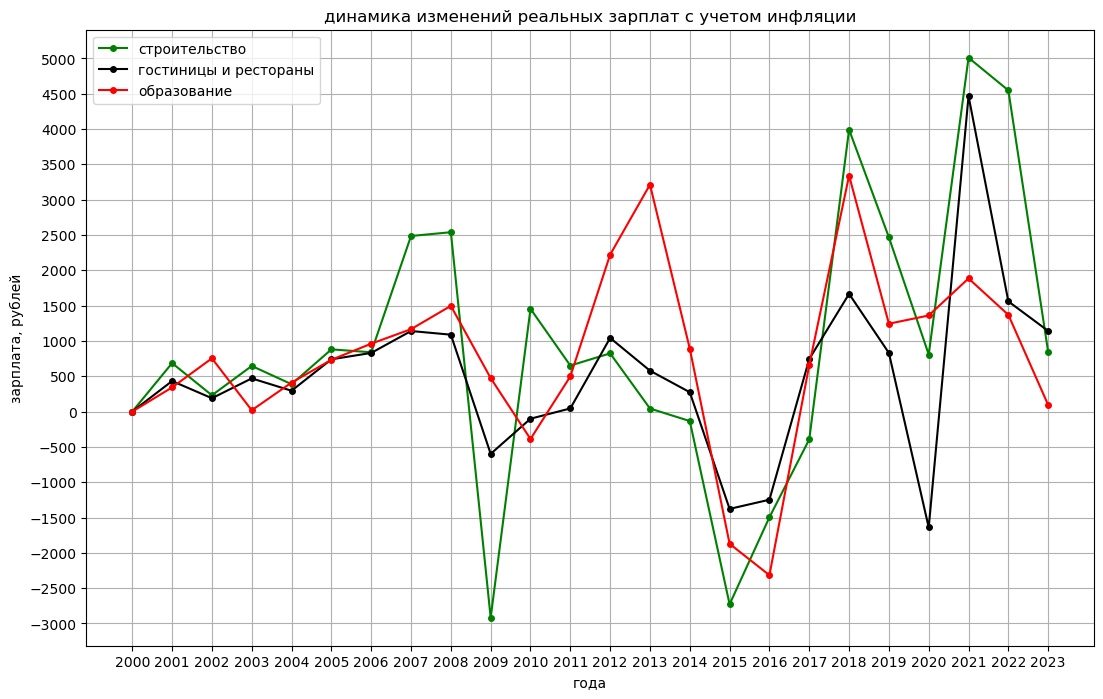

In [23]:
# график роста зарплат с учетом инфляции
plt.figure(figsize=[13,8])
# plt.axhline(y=0, color='blue', linestyle='--')
plt.yticks(np.arange(-3000, 5100, step=500))
plt.grid()
plt.plot(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[0].values, color='green', marker='.', markersize=8)
plt.plot(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[1].values, color='black', marker='.', markersize=8)
plt.plot(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[2].values, color='red', marker='.', markersize=8)
plt.title('динамика изменений реальных зарплат с учетом инфляции')
plt.xlabel('года')
plt.ylabel('зарплата, рублей')
plt.legend(['строительство','гостиницы и рестораны','образование'])

In [53]:
# насколько выросли реальные зарплаты в процентах по сравнению с прошлым годом
sal_growth_with_inf_percen = (salary_growth_with_inflation.shift(-1, axis=1) / salaries * 100).shift(1, axis=1).round(0).fillna(0)
sal_growth_with_inf_percen.T

,строительство,гостиницы и рестораны,образование
2000,0.0,0.0,0.0
2001,26.0,26.0,28.0
2002,6.0,8.0,41.0
2003,13.0,15.0,1.0
2004,6.0,7.0,12.0
2005,12.0,16.0,17.0
2006,9.0,14.0,18.0
2007,23.0,15.0,17.0
2008,18.0,12.0,17.0
2009,-16.0,-5.0,4.0


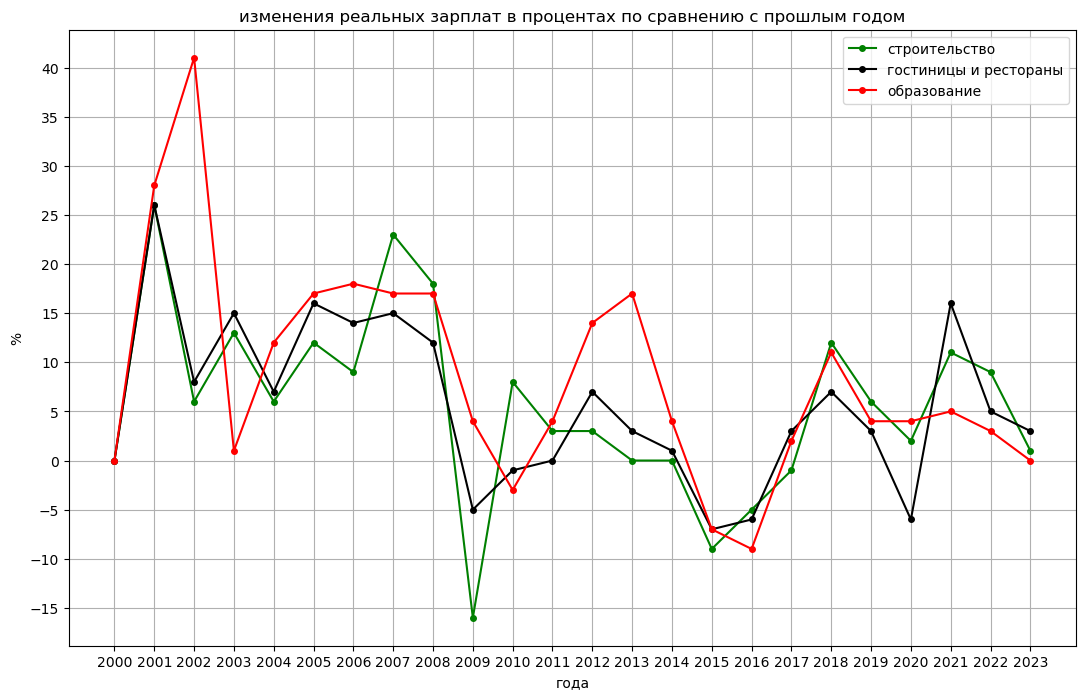

In [58]:
# график изменений реальной зарплаты в процентах по отношению к прошлому году
plt.figure(figsize=[13,8])
plt.yticks(np.arange(-15, 50, step=5))
plt.grid()
plt.plot(sal_growth_with_inf_percen.columns, sal_growth_with_inf_percen.iloc[0].values, color='green', marker='.', markersize=8)
plt.plot(sal_growth_with_inf_percen.columns, sal_growth_with_inf_percen.iloc[1].values, color='black', marker='.', markersize=8)
plt.plot(sal_growth_with_inf_percen.columns, sal_growth_with_inf_percen.iloc[2].values, color='red', marker='.', markersize=8)
plt.title('изменения реальных зарплат в процентах по сравнению с прошлым годом')
plt.xlabel('года')
plt.ylabel('%')
plt.legend(['строительство','гостиницы и рестораны','образование'])

Text(0.5, 1.0, 'сравнение изменений зарплат без и с учетом инфляции')

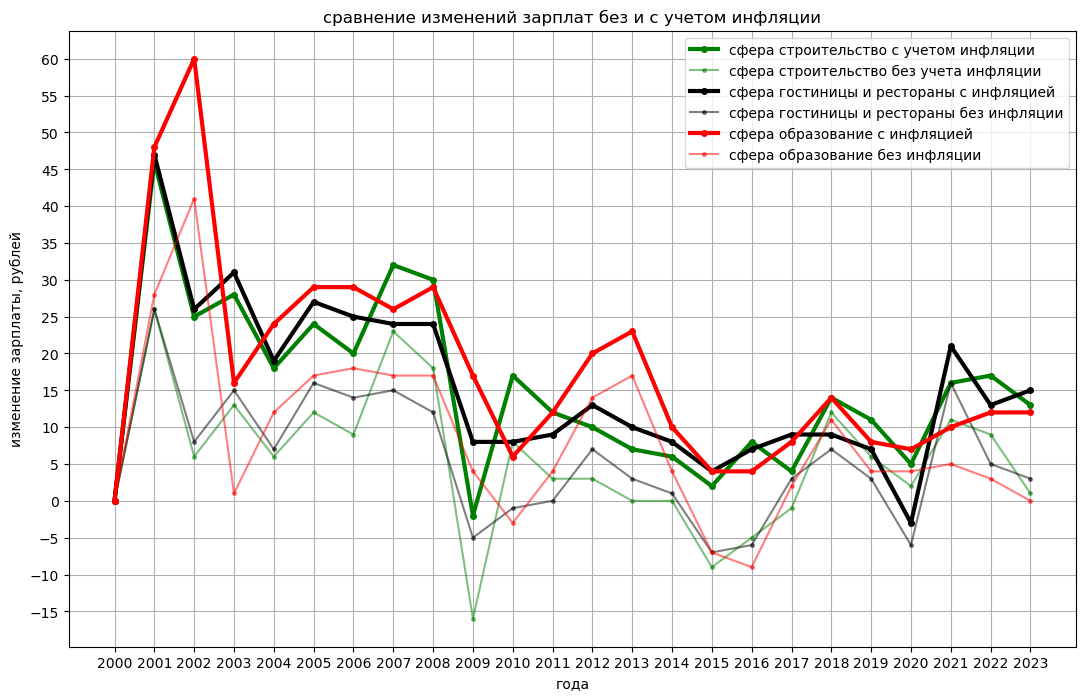

In [60]:
# график роста зарплат без и с учета инфляции
plt.figure(figsize=[13,8])
# plt.axhline(y=0, color='blue', linestyle='--')
plt.grid()
plt.yticks(np.arange(-15, 75, step=5))
plt.plot(sal_growth_percen.columns, sal_growth_percen.iloc[0].values, color='green', marker='.', markersize=8, linewidth=3)
plt.plot(sal_growth_with_inf_percen.columns, sal_growth_with_inf_percen.iloc[0].values, color='green', marker='.', markersize=5, alpha=0.5)
plt.plot(sal_growth_percen.columns, sal_growth_percen.iloc[1].values, color='black', marker='.', markersize=8, linewidth=3)
plt.plot(sal_growth_with_inf_percen.columns, sal_growth_with_inf_percen.iloc[1].values, color='black', marker='.', markersize=5, alpha=0.5)
plt.plot(sal_growth_percen.columns, sal_growth_percen.iloc[2].values, color='red', marker='.', markersize=8, linewidth=3)
plt.plot(sal_growth_with_inf_percen.columns, sal_growth_with_inf_percen.iloc[2].values, color='red', marker='.', markersize=5, alpha=0.5)
plt.xlabel('года')
plt.ylabel('изменение зарплаты, рублей')
plt.legend(['сфера строительство с учетом инфляции', 'сфера строительство без учета инфляции',
            'сфера гостиницы и рестораны с инфляцией', 'сфера гостиницы и рестораны без инфляции',
            'сфера образование с инфляцией', 'сфера образование без инфляции'])
plt.title('сравнение изменений зарплат без и с учетом инфляции')

## детально 

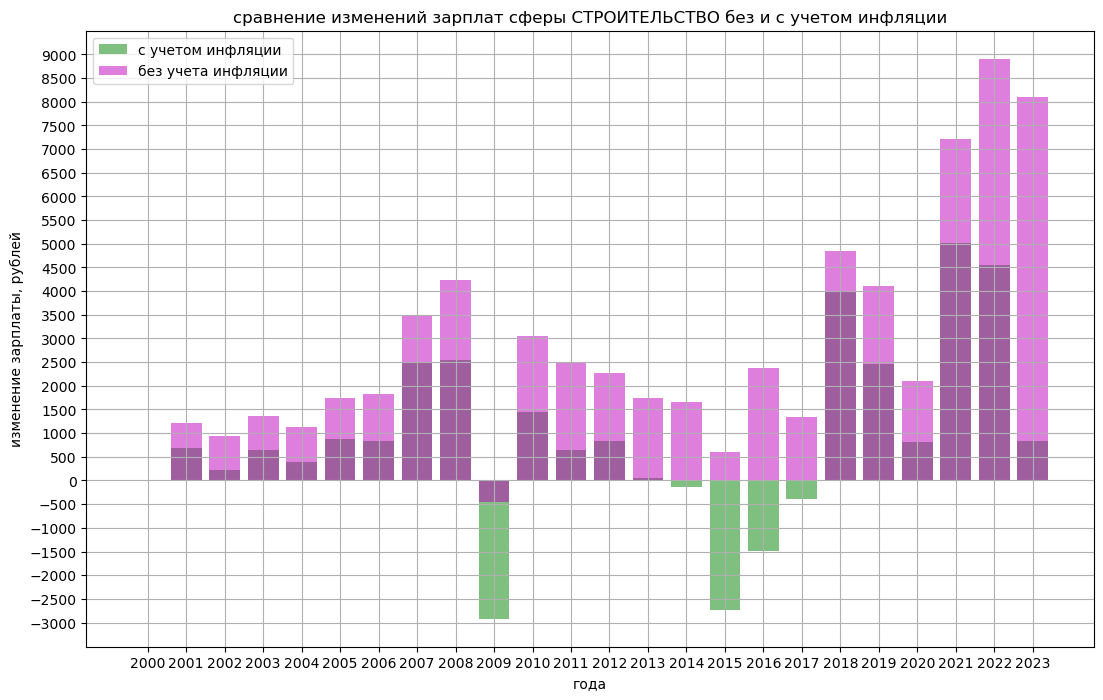

In [24]:
# график изменения зарплат с учетом инфляции
plt.figure(figsize=[13,8])
# plt.axhline(y=0, color='blue', linestyle='--')
plt.yticks(np.arange(-3000, 10000, step=500))
plt.grid()
plt.bar(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[0].values, color='green', alpha=0.5)
plt.bar(salary_growth.columns, salary_growth.iloc[0].values, color='m', alpha=0.5)
# plt.bar(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[1].values, color='black')
# plt.bar(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[2].values, color='red')
plt.title('сравнение изменений зарплат сферы СТРОИТЕЛЬСТВО без и с учетом инфляции')
plt.xlabel('года')
plt.ylabel('изменение зарплаты, рублей')
plt.legend(['с учетом инфляции','без учета инфляции'])

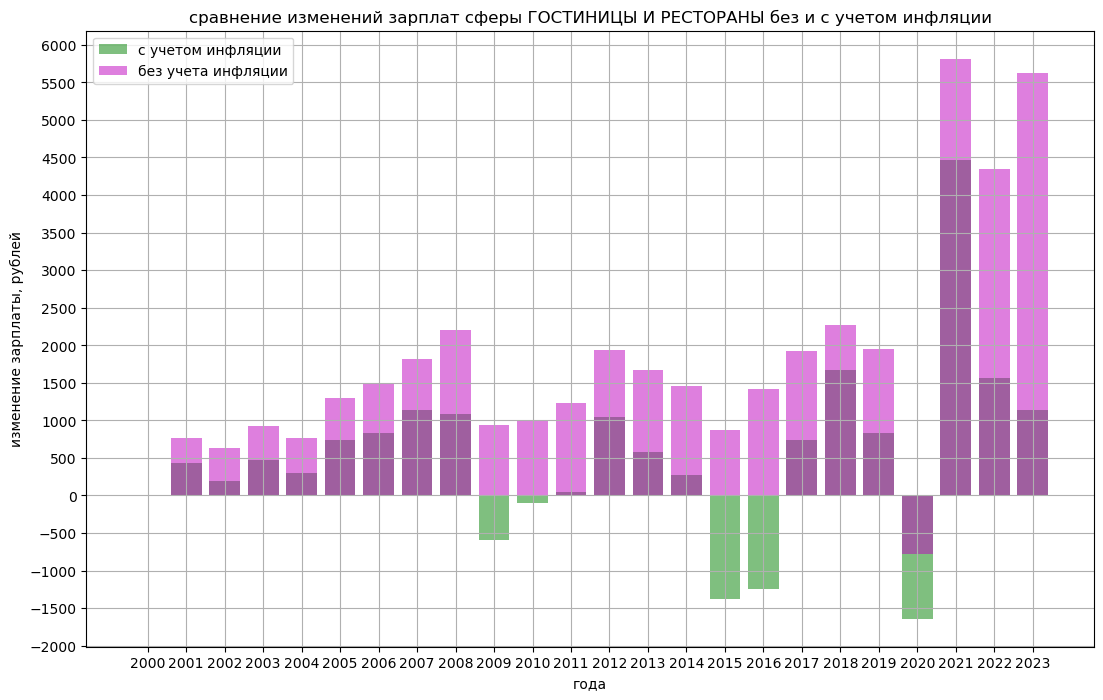

In [25]:
# график изменения зарплат с учетом инфляции
plt.figure(figsize=[13,8])
# plt.axhline(y=0, color='blue', linestyle='--')
plt.yticks(np.arange(-3000, 10000, step=500))
plt.grid()
plt.bar(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[1].values, color='green', alpha=0.5)
plt.bar(salary_growth.columns, salary_growth.iloc[1].values, color='m', alpha=0.5)
# plt.bar(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[1].values, color='black')
# plt.bar(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[2].values, color='red')
plt.title('сравнение изменений зарплат сферы ГОСТИНИЦЫ И РЕСТОРАНЫ без и с учетом инфляции')
plt.xlabel('года')
plt.ylabel('изменение зарплаты, рублей')
plt.legend(['с учетом инфляции','без учета инфляции'])

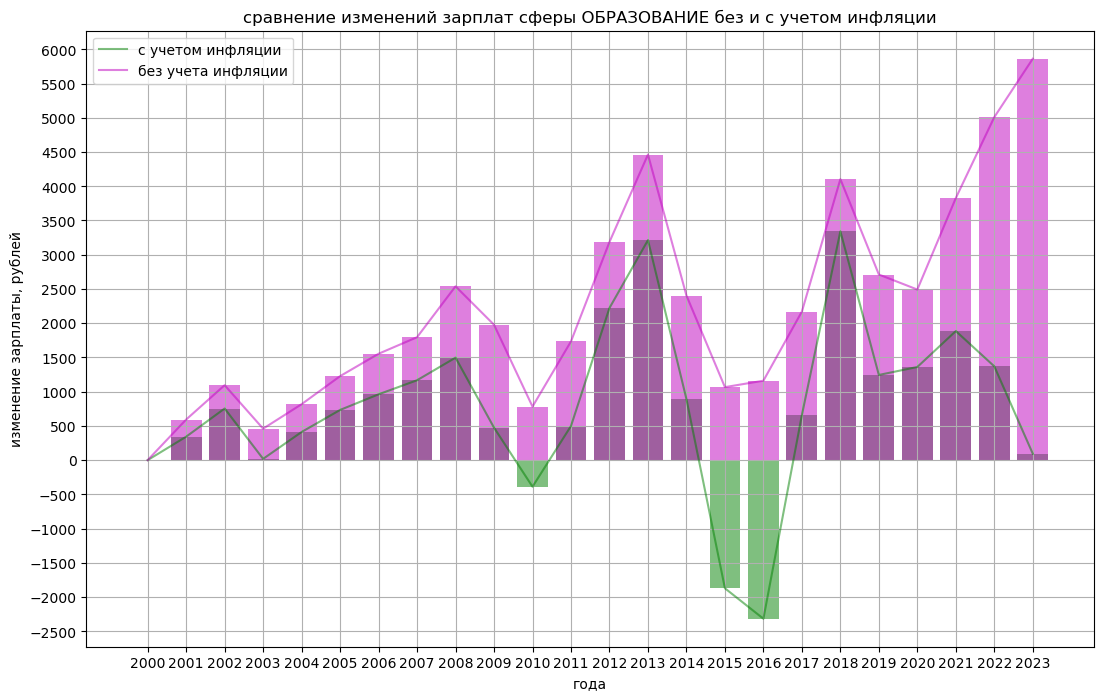

In [26]:
# график изменения зарплат с учетом инфляции
plt.figure(figsize=[13,8])
# plt.axhline(y=0, color='blue', linestyle='--')
plt.yticks(np.arange(-3000, 10000, step=500))
plt.grid()
plt.bar(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[2].values, color='green', alpha=0.5)
plt.plot(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[2].values, color='green', alpha=0.5)
plt.bar(salary_growth.columns, salary_growth.iloc[2].values, color='m', alpha=0.5)
plt.plot(salary_growth.columns, salary_growth.iloc[2].values, color='m', alpha=0.5)
# plt.bar(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[1].values, color='black')
# plt.bar(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[2].values, color='red')
plt.title('сравнение изменений зарплат сферы ОБРАЗОВАНИЕ без и с учетом инфляции')
plt.xlabel('года')
plt.ylabel('изменение зарплаты, рублей')
# plt.text(10, 5888, 'образование', fontweight='bold', fontsize=14)
plt.legend(['с учетом инфляции','без учета инфляции'])

##

Text(0.5, 1.0, 'сравнение изменений зарплат без и с учетом инфляции')

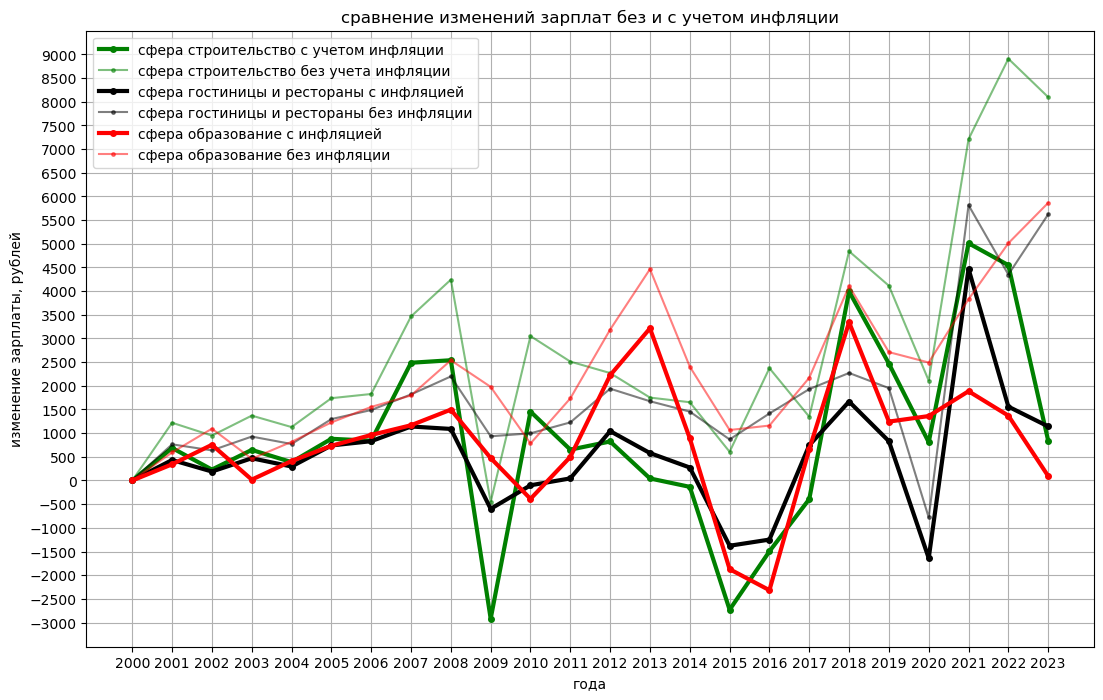

In [27]:
# график роста зарплат без и с учета инфляции
plt.figure(figsize=[13,8])
# plt.axhline(y=0, color='blue', linestyle='--')
plt.grid()
plt.yticks(np.arange(-3000, 10000, step=500))
plt.plot(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[0].values, color='green', marker='.', markersize=8, linewidth=3)
plt.plot(salary_growth.columns, salary_growth.iloc[0].values, color='green', marker='.', markersize=5, alpha=0.5)
plt.plot(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[1].values, color='black', marker='.', markersize=8, linewidth=3)
plt.plot(salary_growth.columns, salary_growth.iloc[1].values, color='black', marker='.', markersize=5, alpha=0.5)
plt.plot(salary_growth_with_inflation.columns, salary_growth_with_inflation.iloc[2].values, color='red', marker='.', markersize=8, linewidth=3)
plt.plot(salary_growth.columns, salary_growth.iloc[2].values, color='red', marker='.', markersize=5, alpha=0.5)
plt.xlabel('года')
plt.ylabel('изменение зарплаты, рублей')
plt.legend(['сфера строительство с учетом инфляции', 'сфера строительство без учета инфляции',
            'сфера гостиницы и рестораны с инфляцией', 'сфера гостиницы и рестораны без инфляции',
            'сфера образование с инфляцией', 'сфера образование без инфляции'])
plt.title('сравнение изменений зарплат без и с учетом инфляции')


Выводы: С учетом инфляции рост зарплат по всем сферам не такой радужный как могло показаться. Часто рост зарплат уходит в 'минус'. Наблюдаем большие разрывы между ростом без инфляции и с инфляией. Видим что в периоды 2008 - 2009, 2014 - 2016, 2018 - 2019, 2021 - 2023 года практически все сферы имели отрицательную динамику изменений реальных зарплат. В 2009 году сильнее всего постарадала сфера строительство.